In [1]:
# Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
import swifter

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import sequence

2023-01-19 14:09:23.793314: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-19 14:09:24.439512: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-19 14:09:24.439538: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-19 14:09:26.187280: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
cyber = pd.read_csv("cybersecurity_tweets.csv")
not_cyber = pd.read_csv("not_cybersecurity_tweets.csv")

In [3]:
# Use pandas.concat() method to ignore_index 
df = pd.concat([cyber, not_cyber], ignore_index=True, axis = 0)

In [4]:
df.head()

,text,label
0,#AI Robo-Advisers and the Future of Financial ...,1
1,Hackers causing havoc on Mexican banking syste...,1
2,CVE-2019-13127 An issue was discovered in mxGr...,1
3,How to protect your online identity #labourcyb...,1
4,Forensic Acquisition - Shadow Cyber Sec https...,1


In [5]:
df.tail()

,text,label
399995,Attackers Test Weak Passwords in Purple Fox Ma...,0
399996,Aviso para los usuarios de correo de @AytoMurc...,0
399997,NPM had an obfuscated birthday-like easter egg...,0
399998,CPUの脆弱性「Spectre」に対応してAMDがリリースしたパッチに問題があることをInt...,0
399999,A new Android banking malware named Octo has a...,0


In [6]:
df.shape

(400000, 2)

In [7]:
# Datatypes
df.dtypes

text     object
label     int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    400000 non-null  object
 1   label   400000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 6.1+ MB


In [9]:
# Checking for null values
df.isnull().sum()

text     0
label    0
dtype: int64

In [10]:
# Check for duplicates
df[df.duplicated()]

,text,label
473,#programming #programmer #Python #javascript #...,1
985,#Security #programming #js #webdev #cybersecu...,1
1051,#programmer #Python #NodeJS #javascripttflx #...,1
1210,The CEO's Critical Role In Driving Cybersecuri...,1
1240,#Security #programming #js #webdev #cybersecu...,1
...,...,...
399872,#Polyswarm marketplace is a community and netw...,0
399888,🔌 Unmetered 100Mbps - 40Gbps ⚡ No saturation &...,0
399930,Malware ve Türleri https://t.co/wFfWW0RCm0 #te...,0
399935,Cisco connects thousands of journalists to the...,0


In [11]:
# Drop duplicates
df.drop_duplicates(keep='first',inplace= True)
df

,text,label
0,#AI Robo-Advisers and the Future of Financial ...,1
1,Hackers causing havoc on Mexican banking syste...,1
2,CVE-2019-13127 An issue was discovered in mxGr...,1
3,How to protect your online identity #labourcyb...,1
4,Forensic Acquisition - Shadow Cyber Sec https...,1
...,...,...
399995,Attackers Test Weak Passwords in Purple Fox Ma...,0
399996,Aviso para los usuarios de correo de @AytoMurc...,0
399997,NPM had an obfuscated birthday-like easter egg...,0
399998,CPUの脆弱性「Spectre」に対応してAMDがリリースしたパッチに問題があることをInt...,0


## Data Preprocessing

In [12]:
df['label'].value_counts()

0    195126
1    195036
Name: label, dtype: int64

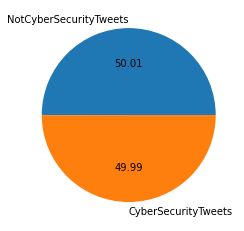

In [13]:
plt.pie(df['label'].value_counts(),labels=['NotCyberSecurityTweets','CyberSecurityTweets'],autopct='%0.2f')
plt.show()

## TEXT PROCESSING (Clean, Tokenize and Normalise)

In [14]:
STOPWORDS=set(stopwords.words('english'))
lemmatizer= WordNetLemmatizer()

def tokenize(text):
    
   #1. Remove links
    text = re.sub(r"http\S+", "", text)

   #2. Normalize the data by converting to lower case and removing punctuations
    text = re.sub("[^a-zA-Z]", " ", text.lower())
    
   #3. Tokenizing: split text into words
    tokens = word_tokenize(text)
   
   #4. Remove stop words
    words = [w for w in tokens if w not in STOPWORDS]
    
    #5. Lemmatize 
    lemmed_words = [lemmatizer.lemmatize(w) for w in words]
    
    clean_tokens = []
    
    for i in lemmed_words:
        clean_tokens.append(i)
        
        ## back to string from list
    text = " ".join(clean_tokens)
    return text

In [15]:
df['Cleantext'] = df['text'].swifter.apply(lambda x: tokenize(x))

Pandas Apply:   0%|          | 0/390162 [00:00<?, ?it/s]

In [16]:
df.head()

,text,label,Cleantext
0,#AI Robo-Advisers and the Future of Financial ...,1,ai robo adviser future financial advice datapr...
1,Hackers causing havoc on Mexican banking syste...,1,hacker causing havoc mexican banking system cy...
2,CVE-2019-13127 An issue was discovered in mxGr...,1,cve issue discovered mxgraph related diagram p...
3,How to protect your online identity #labourcyb...,1,protect online identity labourcyberattack cybe...
4,Forensic Acquisition - Shadow Cyber Sec https...,1,forensic acquisition shadow cyber sec cybersec...


In [17]:
# dropping uncleaned data in the dataframe
df.drop(columns='text',inplace=True)

In [18]:
df

,label,Cleantext
0,1,ai robo adviser future financial advice datapr...
1,1,hacker causing havoc mexican banking system cy...
2,1,cve issue discovered mxgraph related diagram p...
3,1,protect online identity labourcyberattack cybe...
4,1,forensic acquisition shadow cyber sec cybersec...
...,...,...
399995,0,attacker test weak password purple fox malware...
399996,0,aviso para los usuarios de correo de aytomurci...
399997,0,npm obfuscated birthday like easter egg mistak...
399998,0,cpu spectre amd intel gigazine intelcpu


In [19]:
# Check for duplicates
df[df.duplicated()]

,label,Cleantext
76,1,cobalt stike beacon detected uncategorized cyb...
131,1,cobalt stike beacon detected uncategorized cyb...
185,1,cobalt stike beacon detected uncategorized cyb...
233,1,cobalt stike beacon detected uncategorized cyb...
361,1,cobalt stike beacon detected uncategorized cyb...
...,...,...
399988,0,ddos attempt hit russia ukraine conflict inten...
399991,0,since pandemic orgs moved cloud based activity...
399992,0,polyswarm marketplace community network detect...
399994,0,receive free year ddos mitigation service sign...


In [20]:
#dropping the duplicates
df.drop_duplicates(inplace = True)

In [21]:
df['Cleantext'][4]

'forensic acquisition shadow cyber sec cybersecurity internetofthings programmer webdevelopment kalilinux linux forensics digitalevidence digitalforensics itsecurity imageforensics shadowcybersec'

In [22]:
df

,label,Cleantext
0,1,ai robo adviser future financial advice datapr...
1,1,hacker causing havoc mexican banking system cy...
2,1,cve issue discovered mxgraph related diagram p...
3,1,protect online identity labourcyberattack cybe...
4,1,forensic acquisition shadow cyber sec cybersec...
...,...,...
399993,0,creating company data breach response plan dat...
399996,0,aviso para los usuarios de correo de aytomurci...
399997,0,npm obfuscated birthday like easter egg mistak...
399998,0,cpu spectre amd intel gigazine intelcpu


In [23]:
X = df.drop('label',axis=1)
y = df['label']

In [24]:
X.head()

,Cleantext
0,ai robo adviser future financial advice datapr...
1,hacker causing havoc mexican banking system cy...
2,cve issue discovered mxgraph related diagram p...
3,protect online identity labourcyberattack cybe...
4,forensic acquisition shadow cyber sec cybersec...


In [25]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

## Split the dataset into Training and Testing datasets

In [26]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X['Cleantext'], y, test_size=0.2,random_state = 42)

## Tokenization

In [27]:
# Defining pre-processing parameters
max_len = 50 
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>' # out of vocabulary token
vocab_size = 500

In [28]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = vocab_size, 
                      char_level = False,
                      oov_token = oov_tok)
tokenizer.fit_on_texts(X_train)

In [29]:
#saving tokenizer
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [30]:
# Get the word_index
word_index = tokenizer.word_index
total_words = len(word_index)
total_words

198244

## Sequence and padding

In [31]:
#importing pad sequences for 
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [32]:
#representing  each sentence by sequences of numbers using texts_to_sequencesfrom Tokenizer object
#for train data
training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences,
                                maxlen = max_len,
                                padding = padding_type,
                                truncating = trunc_type)

In [33]:
# for test data
testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences,
                               maxlen = max_len,
                               padding = padding_type,
                               truncating = trunc_type)

In [34]:
#The shape of training and testing padded (tensor):
print('Shape of training tensor: ', training_padded.shape)
print('Shape of testing tensor: ', testing_padded.shape)

Shape of training tensor:  (240013, 50)
Shape of testing tensor:  (60004, 50)


## Model Building

In [35]:
# Define parameter
embedding_dim = 16
drop_value = 0.2
n_dense = 24
n_lstm = 128
drop_lstm = 0.2

# Define LSTM Model 
model1 = Sequential()
model1.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model1.add(SpatialDropout1D(drop_lstm))
model1.add(LSTM(n_lstm, return_sequences=False))
model1.add(Dropout(drop_lstm))
model1.add(Dense(1, activation='sigmoid'))

2023-01-19 14:11:07.267729: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-19 14:11:07.268726: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-19 14:11:07.268762: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ubuntu-Zako): /proc/driver/nvidia/version does not exist
2023-01-19 14:11:07.269717: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [67]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            8000      
                                                                 
 spatial_dropout1d (SpatialD  (None, 50, 16)           0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 128)               74240     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 82,369
Trainable params: 82,369
Non-trainable params: 0
____________________________________________________

In [36]:
# Compile the model
model1.compile(loss = 'binary_crossentropy',
               optimizer = 'adam',
               metrics = ['accuracy'])

In [37]:
# Train the model:
early_stop = EarlyStopping(monitor='val_loss', patience=2)
history = model1.fit(training_padded,
                     y_train,
                     epochs=10, 
                     validation_data=(testing_padded, y_test),
                     callbacks =[early_stop],
                     verbose=2)

Epoch 1/10
7501/7501 - 344s - loss: 0.1149 - accuracy: 0.9652 - val_loss: 0.0953 - val_accuracy: 0.9745 - 344s/epoch - 46ms/step
Epoch 2/10
7501/7501 - 382s - loss: 0.0832 - accuracy: 0.9746 - val_loss: 0.0756 - val_accuracy: 0.9749 - 382s/epoch - 51ms/step
Epoch 3/10
7501/7501 - 372s - loss: 0.0741 - accuracy: 0.9758 - val_loss: 0.0714 - val_accuracy: 0.9761 - 372s/epoch - 50ms/step
Epoch 4/10
7501/7501 - 335s - loss: 0.0701 - accuracy: 0.9775 - val_loss: 0.0692 - val_accuracy: 0.9778 - 335s/epoch - 45ms/step
Epoch 5/10
7501/7501 - 365s - loss: 0.0676 - accuracy: 0.9786 - val_loss: 0.0681 - val_accuracy: 0.9779 - 365s/epoch - 49ms/step
Epoch 6/10
7501/7501 - 359s - loss: 0.0661 - accuracy: 0.9791 - val_loss: 0.0699 - val_accuracy: 0.9779 - 359s/epoch - 48ms/step
Epoch 7/10
7501/7501 - 352s - loss: 0.0644 - accuracy: 0.9796 - val_loss: 0.0674 - val_accuracy: 0.9784 - 352s/epoch - 47ms/step
Epoch 8/10
7501/7501 - 362s - loss: 0.0630 - accuracy: 0.9798 - val_loss: 0.0663 - val_accuracy: 

In [38]:
# Save the Model
model1.save('lstm.h5')

In [85]:
# preprocessing the test data
def prediction(text):                     
    text = tokenize(text)
    tokenized_text = tokenizer.texts_to_sequences(np.array([text]))
    vector = pad_sequences(tokenized_text, maxlen=50)
    return vector

In [86]:
vector = prediction('Major Ransomware Attack Against Thousands Of Businesses Worldwide - NBC News https://t.co/u6oPsBYFvw')

In [87]:
# model prediction
prediction = model1.predict(vector)
if np.round(prediction) == 0:
    print('Its Not a CyberSecurity Tweet')
else:
    print('Its a CyberSecurity Tweet')

1/1 [==============================] - 0s 27ms/step
Its a CyberSecurity Tweet
